In [67]:
import seaborn as sns

In [68]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
df_titanic.shape

(891, 15)

In [70]:
'name' in df_titanic.columns.tolist()

False

In [71]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

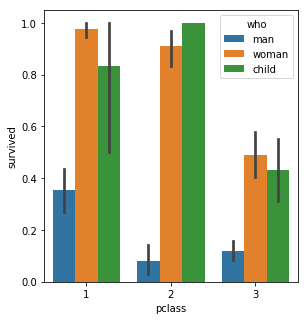

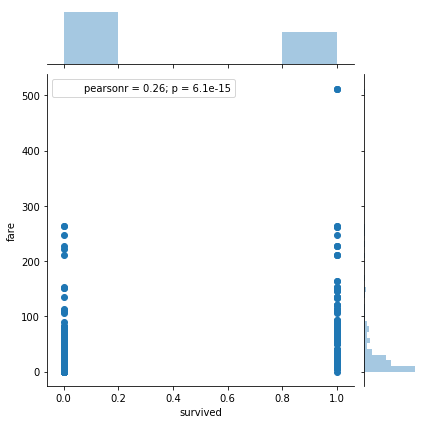

In [72]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.barplot(x='pclass', y='survived', hue='who', data=df_titanic)
sns.jointplot(x='survived', y='fare', data=df_titanic)

In [73]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())
print(df_titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [75]:
sex_mapping = {'male':0, 'female':1}
df_titanic['sex'] = df_titanic['sex'].map(lambda x: sex_mapping[x])

In [76]:
print(df_titanic['embark_town'].unique())
df_titanic['embark_town'] = df_titanic['embark_town'].fillna('Southampton')
df_titanic.loc[df_titanic['embark_town'] == 'Southampton', 'embark_town'] = 0
df_titanic.loc[df_titanic['embark_town'] == 'Cherbourg', 'embark_town'] = 1
df_titanic.loc[df_titanic['embark_town'] == 'Queenstown', 'embark_town'] = 2

['Southampton' 'Cherbourg' 'Queenstown' nan]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

predictors = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fage', 'embark_town']

alg = LinearRegression()
kf = KFold(df_titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    